In [17]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import ipyvolume as ipv
import numpy as np

import warnings
#warnings.simplefilter("ignore")

<h1>Sub-task 3.1</h1>

In [2]:
data = pd.read_csv("kc_house_data_reduced.csv")
data.head()

,price,condition,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,7,1180,0,1340
1,538000.0,3,7,2170,400,1690
2,180000.0,3,6,770,0,2720
3,604000.0,5,7,1050,910,1360
4,510000.0,3,8,1680,0,1800


In [3]:
X = StandardScaler().fit_transform(data)
feature_names = data.columns

<h3>Feature correlation matrix</h3>

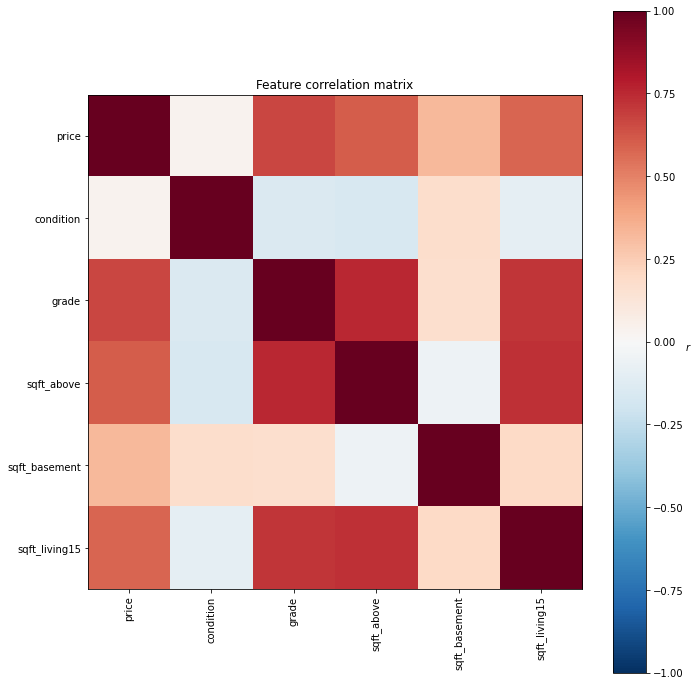

In [4]:
def FCM(n, names, data):
    plt.figure(figsize=[10,10])
    ax = plt.axes()

    im = ax.imshow(np.corrcoef(data.T), cmap="RdBu_r", vmin=-1, vmax=1)
    
    tot = []
    for x in range(n):
        tot.append(x)
    ax.set_xticks(tot)
    ax.set_xticklabels(list(names), rotation=90)
    ax.set_yticks(tot)
    ax.set_yticklabels(list(names))

    plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
    ax.set_title("Feature correlation matrix")
    plt.tight_layout()
FCM(6, feature_names, X)

In [5]:
def createGraphFA(n_com, data, length):
    
    plt.figure(figsize=[10,10])
    ax = plt.axes()
    List = [[],[],[]]
    
    for num in range(n_com):
        List[0].append("Comp."+str(num+1))
        List[1].append(num)
        
    for num in range(length):
        List[2].append(num)
        
    X = StandardScaler().fit_transform(data)
    feature_names = data.columns
    factor = FactorAnalysis(n_components=n_com, max_iter=2000).fit(X)
    vmax = np.abs(factor.components_.T).max()
    im = ax.imshow(factor.components_.T, cmap="RdBu_r", vmax=1, vmin=-1)

    ax.set_xticks(List[1])
    ax.set_xticklabels(List[0])
    ax.set_yticks(List[2])
    ax.set_yticklabels(list(feature_names))

    plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
    plt.show()

<h3>Quality</h3>

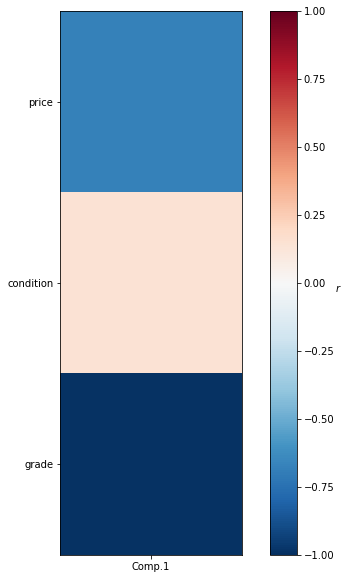

In [6]:
quality = pd.DataFrame(data)
quality.drop(["sqft_above","sqft_basement","sqft_living15"],axis=1, inplace=True)

createGraphFA(1,quality, 3)

<h3>Size</h3>

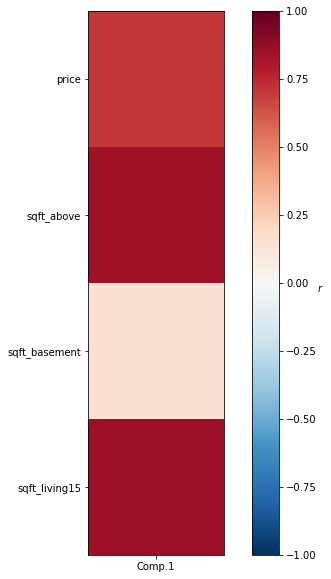

In [7]:
size  = pd.DataFrame(data)
size.drop(["condition","grade"],axis=1, inplace=True)

createGraphFA(1,size, 4)

<h3>Entire data</h3>

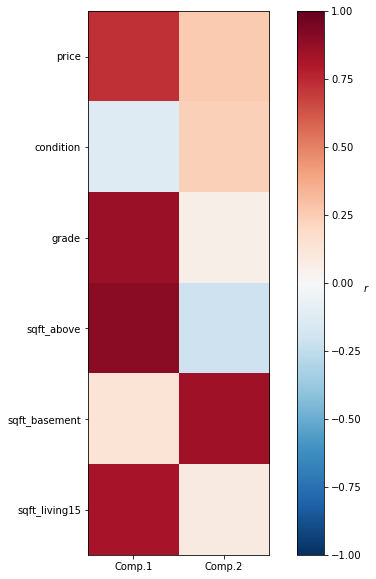

In [8]:
createGraphFA(2, data, 6)

<h3>Explanation</h3>
<p>I firstly created a feature correlation matrix to understand how each feature relates to each other. I could tell from the beginning that condition and basement size had very little effect on the other features. My colleague’s suggestion of using two latent variables: quality and size. I discovered that grade influenced price, but condition did not. Also, two out of the three measures influenced price, basement size did not. When a model with two components was fitted to the data, the first component concluded what I had previously discovered, when any feature except condition and basement size is increased, the price also increases.</p>

<h1>Sub-task 3.2</h1>

In [9]:
data2 = pd.read_csv("kc_house_data.csv")
data2.shape

(21613, 19)

In [10]:
nulls = (data2 == 0).astype(int).sum(axis=0)
data2.drop(["waterfront","view","yr_renovated"],axis=1, inplace=True)
feature_names = data2.columns
nulls

price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [11]:
X = StandardScaler().fit_transform(data2)
pca = PCA(n_components=3).fit(X)
pca_data = pca.transform(X)

X.shape

(21613, 16)

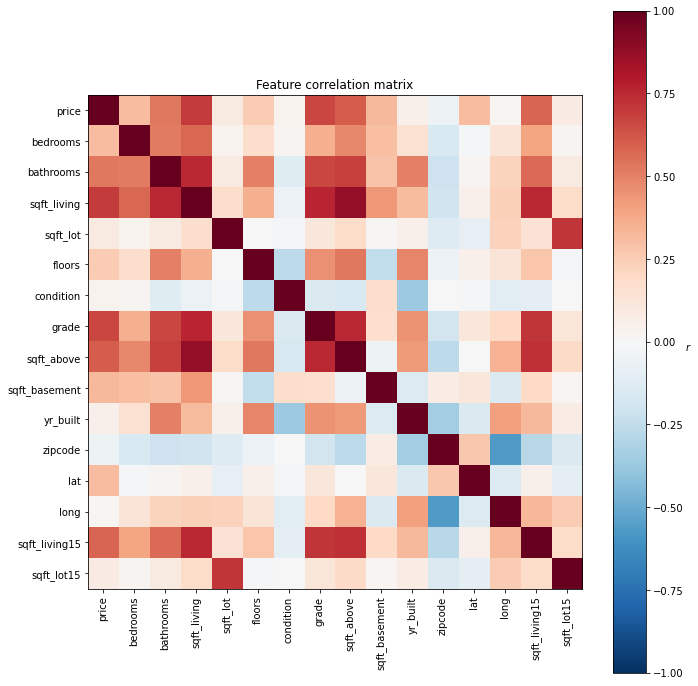

In [12]:
FCM(16, feature_names, X)

<h3>Visualised in three dimensions</h3>

In [13]:
scatter = ipv.scatter(pca_data[:, 0],pca_data[:, 1],pca_data[:, 2], marker="sphere")
ipv.xyzlabel("PC1","PC2", "PC3")
ipv.show()

In [14]:
def createGraphPCA(n):
    pca = PCA(n_components=n).fit(X)
    pca_data = pca.transform(X)

    per_var = np.round(pca.explained_variance_, decimals=1)
    max_per_var = np.round(pca.explained_variance_ratio_, decimals=1)
    labels = ["PC" +str(x) for x in range(1, len(per_var)+1)]

    plt.figure(figsize=[10,10])
    plt.bar(range(1,n+1), height=per_var, color = "grey", tick_label=labels)
    plt.plot(np.linspace(0.5,n+0.5,num=n*10-1), np.linspace(1,1,num=n*10-1), ".b")

    for i, v in enumerate(per_var):
        plt.text(i+0.85, per_var[i]+0.1, v, color='black', fontweight='bold')

        plt.ylabel("Eigenvalue")
    plt.xlabel("Principal Component")
    plt.title("Scree Plot")
    plt.show()

<h3>Scree Plot</h3>

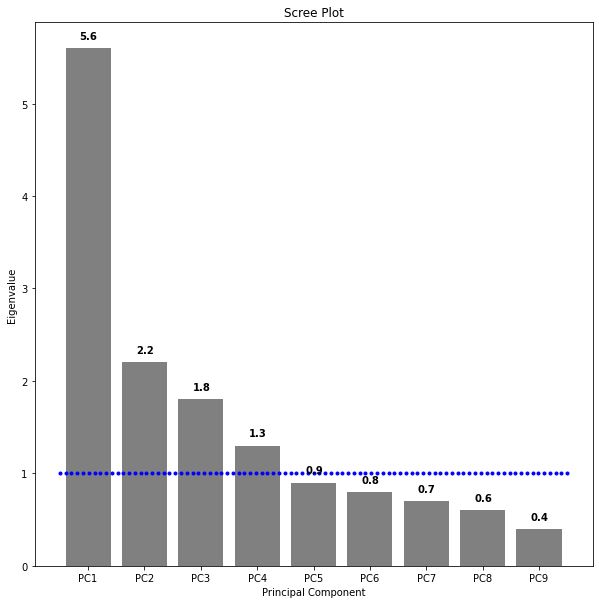

In [15]:
createGraphPCA(9)

<h3>Explanation</h3>
<p>Kaiser Rule states that an eigenvalue of 1.0 means that the principal component contains as much information as a single variable. Using that rule I can determine that 3 dimensions does not capture all the important details of the original dataset, as 4 principal components have an Eigenvalue above 1. Looking at the Scree plot we can see that four dimensions should be the minimum. With trying to reduce the dimensionality, I found that the columns: waterfront, view and yr_renovated were rarely used so I removed them as they would not give enough information about the price.</p>